In [75]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [76]:
# Using the Auto Dataset
auto = pd.read_csv('../datasets/Auto.csv',index_col='name')

In [77]:
# info about the data
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [78]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [79]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 27.9+ KB


In [80]:
# Cleaning data
auto[auto.horsepower=='?']=0

In [81]:
auto[auto.horsepower=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,


In [82]:
auto.horsepower = auto.horsepower.apply(pd.to_numeric)

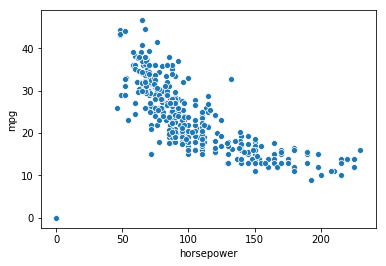

In [83]:
sns.scatterplot(auto.horsepower,auto.mpg)

### Perform simple linear regression and find summary

i. Is there a relationship between the predictor and the re-
sponse?

ii. How strong is the relationship between the predictor and
the response?

iii. Is the relationship between the predictor and the response
positive or negative?

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

**Using statsmodel package to display the summary**

In [84]:
# default shape is 397 rows , converting to 397 rows and 1 col
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg.values.reshape(-1,1)

In [90]:
# OLS - ordinary least squares model
# adding constant ones for B0
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [99]:
# Printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           3.43e-42
Time:                        17:53:11   Log-Likelihood:                -1304.2
No. Observations:                 397   AIC:                             2612.
Df Residuals:                     395   BIC:                             2620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0772      0.901     40.046      0.000      34.306      37.848
x1            -0.1253      0.008    -15.387      0.000      -0.141      -0.109
==============================================================================
Omnibus:                      189.190   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2048.077
Skew:                          -1.736   Prob(JB):                         0.00
Kurtosis:                      13.572   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Getting the confidence interval predictions for horspower =98
pred = model.get_prediction([1,98])

In [114]:
pred.summary_frame(what='prediction')

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.796455,0.327954,23.151701,24.441208,11.039174,36.553736


In [115]:
pred.table

OrderedDict([('mean', array([23.79645466])),
             ('mean_se', array([0.32795411])),
             ('mean_ci_lower', array([23.15170087])),
             ('mean_ci_upper', array([24.44120846])),
             ('obs_ci_lower', array([11.0391736])),
             ('obs_ci_upper', array([36.55373573]))])

1 - There is a relationship b/w predictor and response

2 - There is a strong relationship b/w horsepower and mpg , p value ~ 0

3 - There is a negetive correlation b/w horsepower and mpg , as horsepower increases mpg decreases

4 - At 98 horsepower mpg ~ 24.4


Plot the response and the predictor. 

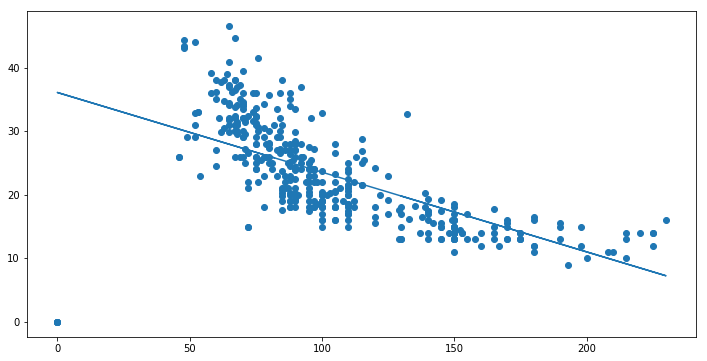

In [124]:
# Two plots - a scatter and one line
fix,ax = plt.subplots(figsize=(12,6))
# scatter plot
ax.scatter(auto.horsepower.values,y)
# line plot
ax.plot(auto.horsepower.values,model.fittedvalues)

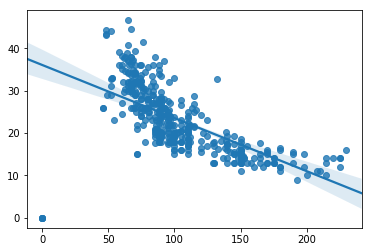

In [125]:
# or can also use sns regplot
sns.regplot(auto.horsepower.values,auto.mpg.values)

### Produce diagnostic plots of the least squares regression fit.

Code from https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

The values required for diagnostic plots 

In [127]:
# fitted values
fitted_y = model.fittedvalues

# residuals
residuals_y = model.resid

# Normalized residuals
residuals_norm = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
residuals_norm_abs = np.sqrt(np.abs(residuals_norm))

# absolute residuals
residuals_abs = np.abs(residuals_y)

# leverage 
leverage = model.get_influence().hat_matrix_diag

# cook's distance
cooks = model.get_influence().cooks_distance[0]

**1. Residual Plot** -

Scatterplot of fitted values against residuals with "locally weighted scatterplot smoothng (lowess)" regression line showing apaarent trend.

Using seaborn residplot 

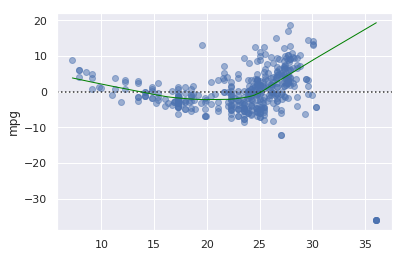

In [130]:
sns.set()
sns.residplot(fitted_y,'mpg',data=auto,lowess=True,scatter_kws={'alpha':0.5},line_kws={'color':'green','lw':1})

**2. QQ Plot**-

Shows how well the distribution of residuals fit the normal distribution. This plots the standardized (z-score) residuals against the theoretical normal quantiles .Anything quite off the diagonal may be a concern for further investigation

Using ProbPlot and qqplot from stastmodel graphics 

In [131]:
from statsmodels.graphics.gofplots import ProbPlot

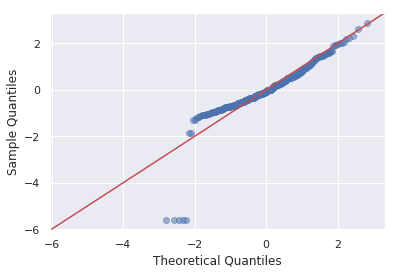

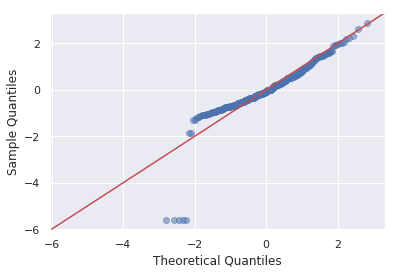

In [132]:
QQ = ProbPlot(residuals_norm)
QQ.qqplot(line='45',alpha=0.5,lw=1)

**3. Scale-Location Plot** -

Residual plot showing it's spread , Can use to detect heteroscedasticity

A scatter plot of absolute square rooted normalized resisuals and fitted values with a 'lowess' reggresion line

Using matplotlib scatter and seaborn regplot

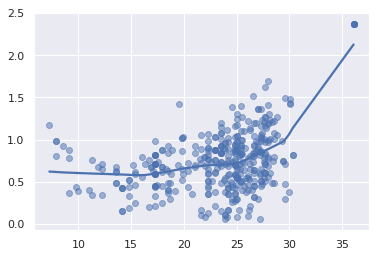

In [138]:
plt.scatter(fitted_y,residuals_norm_abs,alpha=0.5)
sns.regplot(fitted_y,residuals_norm_abs,scatter=False,lowess=True,ci=False)

**4. Leverage Plot**-

Shows if any outliers habe influence over the regression fit. Anything outside the group and outside 'Cook's Distance' lines may have an influence over fit

Implementing from scratch

* Scatterplot of leverage values vs standardized residuals
* Lowess Regression line from that
* Cook's Distance Lines

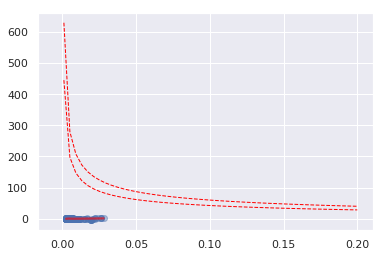

In [141]:
plt.scatter(leverage,residuals_norm,alpha=0.4)
sns.regplot(leverage,residuals_norm,scatter=False,lowess=True,line_kws={'color':'red','alpha':0.6})

# For cooks distance lines
def graph(formula,x_range):
    x = x_range
    y = formula(x)
    plt.plot(x,y,lw=1,ls='--',color='red')

# number of model parameters
p = len(fitted_y)

# 0.5 line
graph(lambda x:np.sqrt((0.5 * p *(1 - x))/x) ,
     np.linspace(0.001,0.200,50))

# 1 line
graph(lambda x:np.sqrt((1 * p *(1 - x))/x) ,
     np.linspace(0.001,0.200,50))